In [1]:
from __future__ import division
from sklearn import linear_model
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Logistic Regression

In this notebook, I will implement Logistic Regression. Logistic Regression is a Generalized Linear model. Now, what do we mean by a Generalized Linear model?


## Generalized Linear Model

In Linear regression models the model prediction `y(x, w)` is given by a linear function of the parameters `w`. In the simplest case, the model is also linear in terms of the input variables and therefore takes the form:
                                    
$$y(x)=w^Tx + w_0$$

However, the output of the above equation is unbounded. We need to realize a function form of the posterior probability i.e. $$P(Y = y_j|x = x_i) ........0 <= P(Y|x) <= 1$$

Please note that the value of the posterior probablities lie in the range of `(0,1)`. The question is; How do we achieve this ?


## Activation function: Logistic Sigmoid
To achieve this, we consider a generalization of the linear model in which which we transform the linear function of w using a nonlinear function f ( · ) so that $$y(x)= f(w^Tx + w_0)$$

f(.) is also called the activation function

The activation function that we will use for Logistic Regression is the logistic sigmoid function. It is as shown below

$$f(x)=\frac{1}{1 + e^{-x}} = \frac{e^x}{1 + e^x}$$

Derivative of the sigmoid function is given by 

$$\frac{df(x)}{dx} = f(x)(1-f(x))$$

Shown below is a plot of the sigmoid function. It maps everything in the range (-100, 100) to (0, 1) which is what we want. Thus it looks like a good functional realization of our posterior probability. Try changing the range and you will notice that the output will always lie in between 0 and 1

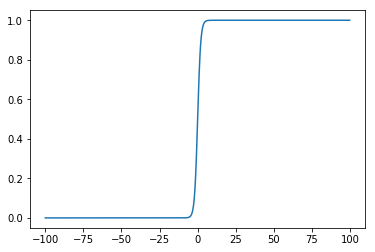

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-100, 100, 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# Approach :

I use the gradient ascent method to implement Logistic Regression. 
The approach is explained below : 

<img src="blob/master/files/ga1.png">

<img src="blob/master/files/ga2.png">

In [3]:
class LogisticRegression:
    
    def __init__(self, X, y, w, alpha):
        """
        Args:
            X = N x d dimensional features
            y = N X 1 column vector of the output class
            w = d X 1 column vector of weights that we will calculate while training our Logistic Regressor
        """
        self.X = X
        self.y = y
        self.alpha = alpha
        self.w = w
    
    @staticmethod
    def sigmoid_function(x):
        """
        Computes the Logistic sigmoid of the input X.
        """
        val = 1/(1 + np.exp(-x))
        return val
    
    @staticmethod
    def compute_regressor(w, X):
        '''
        Computes the dot product in between the w and X matrix. 
        '''
        regressor = np.dot(w, X)
        return LogisticRegression.sigmoid_function(regressor)
       
    def gradient(self, j):
        """
        Computes the gradient of the cost function. Please note that we 
        calculate the gradient using the sum of the errors on all the data samples.
        Thus we are using the Batch Gradient Ascent method.
        """
        total_error = 0
        for i in xrange(len(self.y)):
            xi = self.X[i]
            xij = xi[j]
            yi = self.y[i]
            ri = LogisticRegression.compute_regressor(self.w, xi)
            if yi == -1:
                yi = 0
            diff = xij*(yi-ri)
            total_error += diff
        constant = float(self.alpha)/float(len(self.y))
        grad = constant * total_error
        return grad
    
    
    def gradient_ascent(self):
        """
        Updates each weight by the gradient of the cost function
        """
        wi = []
        for j in xrange(len(self.w)):
            grad = self.gradient(j)
            wij = self.w[j] + grad
            wi.append(wij)
        return wi
    
    
    def train(self, max_iters):
        """
        While training, we just run the gradient ascent for a maximum number of iterations.
        """
        for counter in xrange(max_iters):
            wi = self.gradient_ascent()
            self.w = wi;
    
    def predict(self, x):
        """
        If the posterior probability is > 0.5 then 
        """
        posterior_prob = LogisticRegression.compute_regressor(self.w, x)
        if posterior_prob > 0.5:
            return 1, posterior_prob
        elif posterior_prob < 0.5:
            return -1, posterior_prob
        else:
            return random.choice([-1, 1])

# Let us test our implementation

I have created a simple linearly separable synthetic dataset with 2 classes 1(match) and -1(non-match)

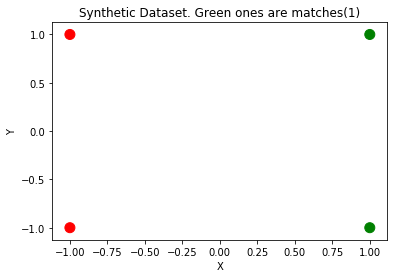

In [7]:
X1 = np.array([1, 1, -1, -1])
X2 = np.array([1, -1, 1, -1])

colors = {0:'red', 1:'green'}
color =[1, 1, 0, 0]

df = pd.DataFrame(dict(X=X1, Y=X2, color=color))
fig, ax = plt.subplots()
ax.scatter(df['X1'], df['Yx'], c=df['color'].apply(lambda x: colors[x]), s=100)
ax.set_title("Synthetic Dataset. Green ones are matches(1)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

# Train the classifier

In [8]:
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, 1, -1, -1])
w = [0, 0]
alpha = 0.1
lr = LogisticRegression(X, Y, w, alpha)
lr.train(max_iters = 100)

In [9]:
lr.w # These are our final weights for each feature

[2.1854715036667325, 0.0]

# Prediction for a new sample
Let us see what is the final probability value that we get. Now, this is very useful for cases when you want to give the end user a feedbck as to why the predicted class is 1 or -1. 

## Posterior probability - Feedback to the user

In [10]:
lr.predict(np.array([-3, 1])) # This class is -1 because the probability of match is 0.0014 as shown below.

(-1, 0.0014189551701895336)

In [11]:
lr.predict(np.array([2, -1])) # This class is +1 because the probability of match is 0.98 as shown below

(1, 0.98751844237202346)

# Let us compare our output with sklearn's output

In [12]:
from sklearn import linear_model

In [13]:
clf = linear_model.LogisticRegression(fit_intercept=True, C=10)

In [14]:
clf.fit(X, Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.coef_ # These are the SKLEARN weights. # Pretty close

array([[ 2.64696108,  0.        ]])

## Decision Boundary

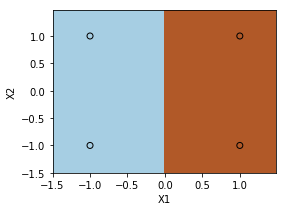

In [16]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()